In [3]:
%matplotlib notebook

from ipywidgets import widgets  
from IPython.display import display
from ipywidgets.widgets.interaction import interact
import Imp

# Simple with interact

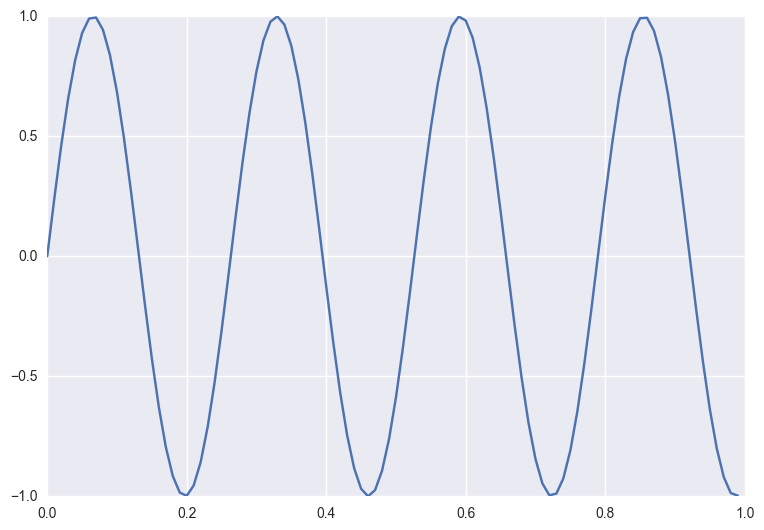

In [7]:
t = Imp.np.arange(0.0, 1.0, 0.01)
fig, ax = Imp.plt.subplots()  

def f(freq, x, y):   
    ax.clear()
    ax.plot(t, Imp.np.sin(2*Imp.np.pi * t*freq))
    display(fig)

interact(f, freq=(1, 10,0.1), x = 10, y=True)

# simple handcrafted application

In [8]:
text = widgets.Text(description="clicked count", width=200)
def handle_submit(sender):
    print(sender.value)

text.on_submit(handle_submit)

checkboxes = [widgets.Checkbox(description = "a", value=True, width=90), widgets.Checkbox(description = "b", value=True, width=90)]
cb_container = widgets.HBox()  

cb_container.children=[i for i in checkboxes]

nClick = 0
def click(b):
    global nClick
    nClick += 1
    text.value = "click " + str(nClick)

    
button = widgets.Button(description="Click Me!", margin=20) 
# http://stackoverflow.com/questions/29086892/ipython-jupyter-align-widgets
# I confirmed 'margin' affects the spacing vertically and horizontally.
button.on_click(click)
display(text, button, cb_container)


# dynamic generate control

<IPython.core.display.Javascript object>


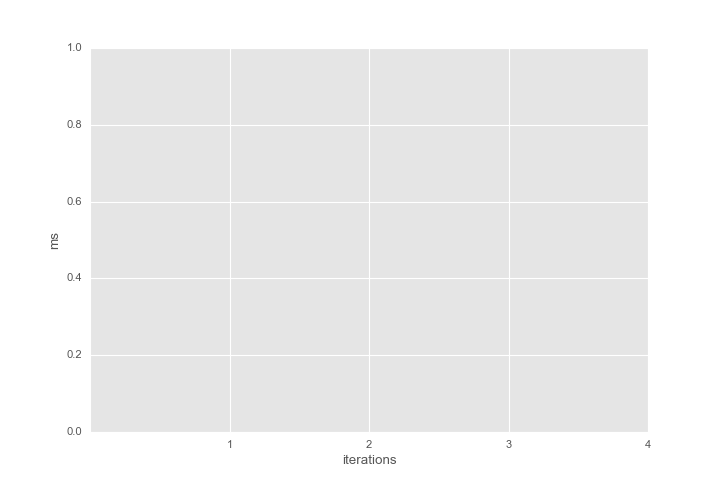

In [9]:
import pandas as pd  
import matplotlib.pyplot as plt  
from ipywidgets import *  
from IPython.display import display  
from ipywidgets import widgets  
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

#displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)  
display(text)

#preparing the plot 
data = pd.DataFrame()  
x = range(1,NUMBER_OF_PINGS+1)  
plots = dict()  
fig, ax = plt.subplots()  
plt.xlabel('iterations')  
plt.ylabel('ms')  
plt.xticks(x)  


#preparing a container to put in created checkbox per domain
checkboxes = []  
cb_container = widgets.HBox()  
display(cb_container)

#add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

#function to deal with the added domain name
def handle_submit(sender):  
    #a part of the magic inside python : pinging
    res = !ping {text.value}
    hits = res.grep("time=").fields(-2).s.replace("time=","").replace("ms", "").split() 
    print hits
    if len(hits) == 0:
        print "Domain gave error on pinging"
    else:
         #rebuild plot based on ping result
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        #add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=checkboxes
        if len(checkboxes) == 1:
            display(button)

#function to deal with the checkbox update button       
def on_button_clicked(b):  
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)  
text.on_submit(handle_submit)  
